<a href="https://colab.research.google.com/github/rodrigodesouza7/crm-churn-analysis/blob/main/An%C3%A1lise_de_Churn_e_Engajamento_de_Clientes_em_uma_Plataforma_SaaS_de_CRM_B2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📁 Etapa 1 — Importação das bibliotecas e configuração inicial

✅ O que esta etapa cobre:
Importação das bibliotecas essenciais para análise de dados
Configuração de estilo e ambiente para visualização

In [17]:
# 📌 SEÇÃO 1 — IMPORTAÇÃO DAS BIBLIOTECAS ESSENCIAIS

# Manipulação e análise de dados

import pandas as pd   # Estrutura e limpeza de dados tabulares
import numpy as np    # Operações matemáticas e vetoriais

# Operações matemáticas e vetoriais

import matplotlib.pyplot as plt  # Criação de gráficos tradicionais
import seaborn as sns            # Gráficos estatísticos com estilo avançado



In [18]:
# Estilo dos gráficos
sns.set_theme(style='whitegrid')          # Define um estilo visual mais limpo
plt.rcParams["figure.figsize"] = (12, 6)  # Define tamanho padrão dos gráficos

📁 Etapa 2 — Leitura do arquivo CSV e inspeção inicial

✅ O que esta etapa cobre:
Carregamento dos dados
Visualização das 5 primeiras linhas
Tipos de dados e informações básicas do DataFrame

In [19]:
# 📌 SEÇÃO 2 — CARREGAMENTO E VISÃO GERAL DOS DADOS

# Lê o arquivo CSV que você fez upload no Colab
df = pd.read_csv('crm_churn_dataset.csv')

# Exibe as 5 primeiras linhas da base de dados
print("🔍 Primeiras 5 linhas do dataset:")
display(df.head())

# Mostra o formato geral (linhas x colunas)
print(f"\n✅ Formato do dataset: {df.shape[0]} linhas e {df.shape[1]} colunas")

# Exibe o tipo de cada coluna e presença de valores nulos
print("\n📊 Informações do dataset:")
df.info()

🔍 Primeiras 5 linhas do dataset:


,customer_id,signup_date,company_size,plan_type,avg_monthly_logins,emails_sent,leads_managed,support_tickets,satisfaction_score,last_login_days_ago,cancelled
0,11355e5f,2020-08-01,Média,Basic,8.887512,106,50,0,3.288775,9,0
1,38f60f3f,2022-08-14,Pequena,Free,11.296619,114,55,2,3.280671,18,0
2,b757c4a0,2020-04-10,Grande,Free,15.576689,86,57,1,1.793741,0,1
3,2ece9751,2022-06-30,Grande,Pro,13.107783,99,53,1,2.491710,55,0
4,6bf95ce2,2024-03-14,Pequena,Basic,5.796647,98,36,1,2.841281,42,0



✅ Formato do dataset: 5000 linhas e 11 colunas

📊 Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          5000 non-null   object 
 1   signup_date          5000 non-null   object 
 2   company_size         5000 non-null   object 
 3   plan_type            5000 non-null   object 
 4   avg_monthly_logins   5000 non-null   float64
 5   emails_sent          5000 non-null   int64  
 6   leads_managed        5000 non-null   int64  
 7   support_tickets      5000 non-null   int64  
 8   satisfaction_score   5000 non-null   float64
 9   last_login_days_ago  5000 non-null   int64  
 10  cancelled            5000 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 429.8+ KB


📌 SEÇÃO 2.1 — TRATAMENTO LEVE DOS DADOS

✅ Objetivos desta etapa:
Corrigir o tipo da coluna signup_date para datetime
Converter colunas categóricas para o tipo category
Deixar os dados prontos para a análise exploratória (EDA)

In [20]:
#Converter signup_date para o tipo datetime
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [21]:
#Converter company_size e plan_type para tipo categórico:
df['company_size'] = df['company_size'].astype('category')
df['plan_type'] = df['plan_type'].astype('category')

In [22]:
# ✅ 3. Verificação das mudanças
print("📋 Tipos de dados após o tratamento:\n")
print(df.dtypes)

📋 Tipos de dados após o tratamento:

customer_id                    object
signup_date            datetime64[ns]
company_size                 category
plan_type                    category
avg_monthly_logins            float64
emails_sent                     int64
leads_managed                   int64
support_tickets                 int64
satisfaction_score            float64
last_login_days_ago             int64
cancelled                       int64
dtype: object


📌 SEÇÃO 3 — ANÁLISE EXPLORATÓRIA (EDA)

✅ Objetivos desta etapa:
Entender a distribuição de cancelamentos
Explorar relações entre churn e variáveis categóricas
Visualizar correlações entre variáveis numéricas
Gerar insights visuais com seaborn e matplotlib


🧪 Célula 1 — Distribuição geral de churn (cancelled)


<ipython-input-24-35277dbd7a3f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cancelled_str', palette=custom_palette)


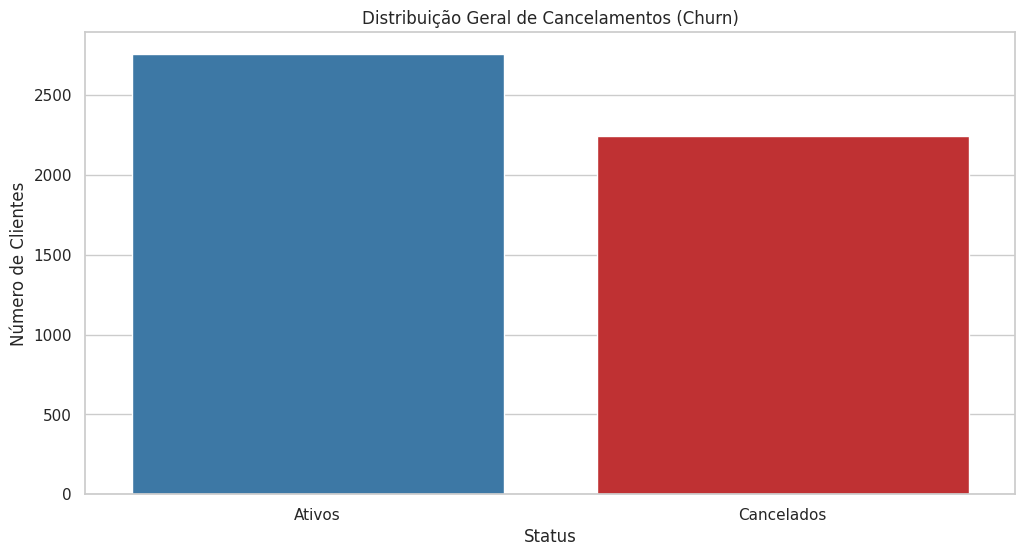

In [24]:
# 📊 3.1 — DISTRIBUIÇÃO GERAL DE CANCELAMENTOS
# Converte a coluna 'cancelled' para string para evitar mapeamento automático de cor
df['cancelled_str'] = df['cancelled'].map({0: 'Ativos', 1: 'Cancelados'})

# Define a paleta manualmente com mapeamento explícito
custom_palette = {
    'Ativos': '#2C7BB6',       # Azul escuro
    'Cancelados': '#D7191C'    # Vermelho forte
}

# Gráfico com paleta definida
sns.countplot(data=df, x='cancelled_str', palette=custom_palette)

plt.title('Distribuição Geral de Cancelamentos (Churn)')
plt.ylabel('Número de Clientes')
plt.xlabel('Status')
plt.show()


🧪 Célula 2 — Churn por Tipo de Plano (plan_type)

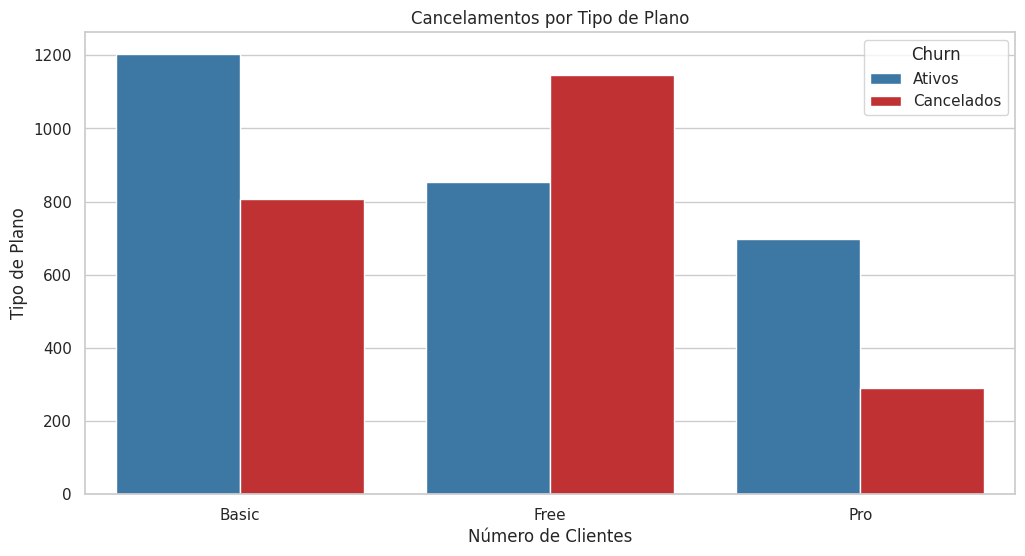

In [28]:
# 📊 3.2 — CHURN POR TIPO DE PLANO

# Aplica padrão de cor consistente para a variável binária 'cancelled'
custom_palette = {
     0: '#2C7BB6',   # Ativos
     1: '#D7191C'    # Cancelados
}

# 📈 Gráfico de contagem com separação por status de churn
sns.countplot(data=df, x='plan_type', hue='cancelled', palette=custom_palette)

# 🎨 Ajustes visuais e rótulos
plt.title('Cancelamentos por Tipo de Plano')
plt.ylabel('Tipo de Plano')
plt.xlabel('Número de Clientes')
plt.legend(title='Churn', labels=['Ativos', 'Cancelados'])

# 📤 Exibe o gráfico
plt.show()

🧪 Célula 3 — Churn por Tamanho da Empresa (company_size)

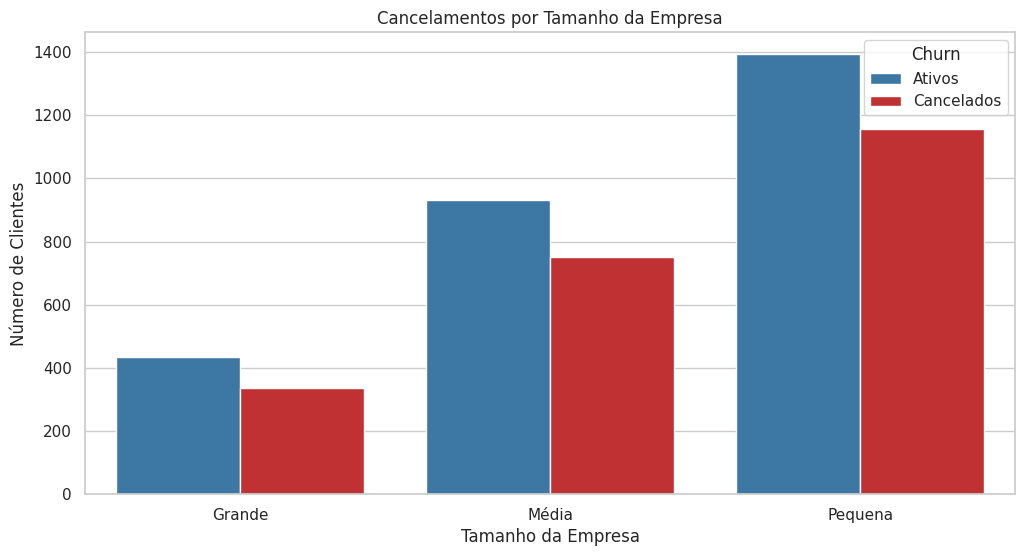

In [29]:
# 📊 3.3 — CHURN POR TAMANHO DA EMPRESA (com paleta padronizada e marcações)

# 🔧 Usa o mesmo padrão de cor profissional do projeto
custom_palette = {
    0: '#2C7BB6',   # Ativos — azul escuro
    1: '#D7191C'    # Cancelados — vermelho forte
}

# 📈 Gráfico de contagem com separação por status de churn
sns.countplot(data=df, x='company_size', hue='cancelled', palette=custom_palette)

# 🧾 Ajustes visuais e rótulos
plt.title('Cancelamentos por Tamanho da Empresa')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn', labels=['Ativos', 'Cancelados'])

# 📤 Exibe o gráfico
plt.show()

🧪 Célula 4 — Mapa de calor de correlação (variáveis numéricas)

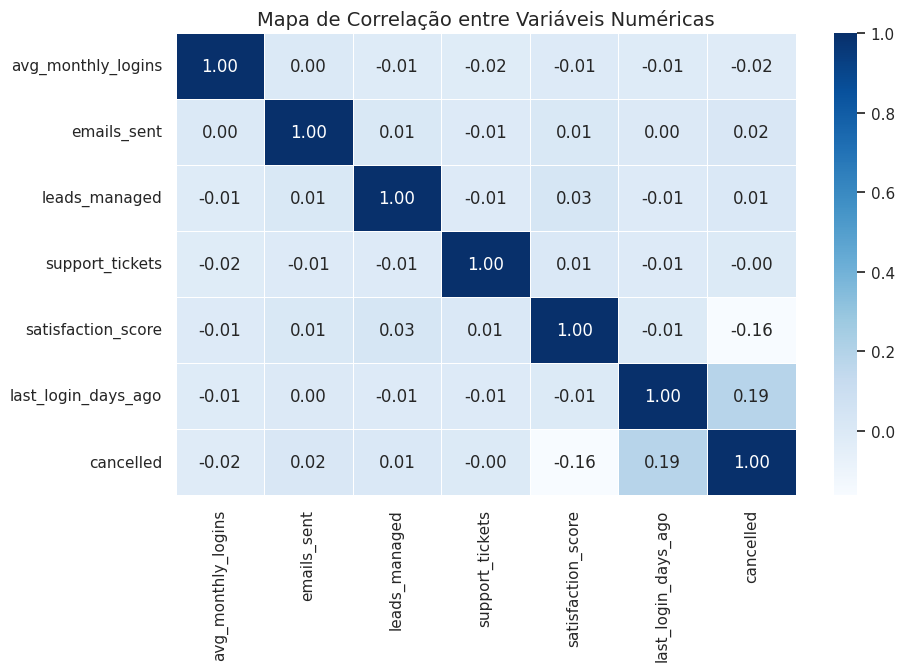

In [30]:
# 📊 3.4 — HEATMAP DE CORRELAÇÃO ENTRE VARIÁVEIS NUMÉRICAS

# 📌 Filtra apenas variáveis numéricas do DataFrame
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 🔍 Calcula a matriz de correlação
corr = df[numeric_cols].corr()

# 🧭 Mapa de calor com anotações e estilo profissional
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues', linewidths=0.5, linecolor='white')

# 🧾 Título e exibição
plt.title('Mapa de Correlação entre Variáveis Numéricas', fontsize=14)
plt.show()


📌 🔍 Análise técnica do Heatmap de Correlação

In [31]:
# 📌 🔍 ANÁLISE TÉCNICA DO MAPA DE CORRELAÇÃO

print("🔎 Principais correlações com o churn (cancelled):\n")

# Insight 1 — Satisfação do cliente
print("1️⃣ satisfaction_score vs cancelled → correlação -0.16")
print("   ➤ Clientes mais satisfeitos têm menor chance de cancelamento.")
print("   ➤ A satisfação é um indicativo importante de retenção.")

# Insight 2 — Tempo desde último login
print("\n2️⃣ last_login_days_ago vs cancelled → correlação +0.19")
print("   ➤ Clientes que ficaram mais tempo sem logar têm maior propensão ao churn.")
print("   ➤ Inatividade recente pode ser um sinal de risco.")

# Insight 3 — Outras variáveis
print("\n3️⃣ Demais variáveis numéricas têm correlação próxima de 0 com churn.")
print("   ➤ emails_sent, leads_managed, support_tickets não apresentam relação direta.")
print("   ➤ Essas variáveis podem ser relevantes em conjunto, mas não isoladamente.")


🔎 Principais correlações com o churn (cancelled):

1️⃣ satisfaction_score vs cancelled → correlação -0.16
   ➤ Clientes mais satisfeitos têm menor chance de cancelamento.
   ➤ A satisfação é um indicativo importante de retenção.

2️⃣ last_login_days_ago vs cancelled → correlação +0.19
   ➤ Clientes que ficaram mais tempo sem logar têm maior propensão ao churn.
   ➤ Inatividade recente pode ser um sinal de risco.

3️⃣ Demais variáveis numéricas têm correlação próxima de 0 com churn.
   ➤ emails_sent, leads_managed, support_tickets não apresentam relação direta.
   ➤ Essas variáveis podem ser relevantes em conjunto, mas não isoladamente.


🧪 Célula 5 — Boxplot: satisfaction_score vs cancelled

<ipython-input-36-b0c4fa218a79>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


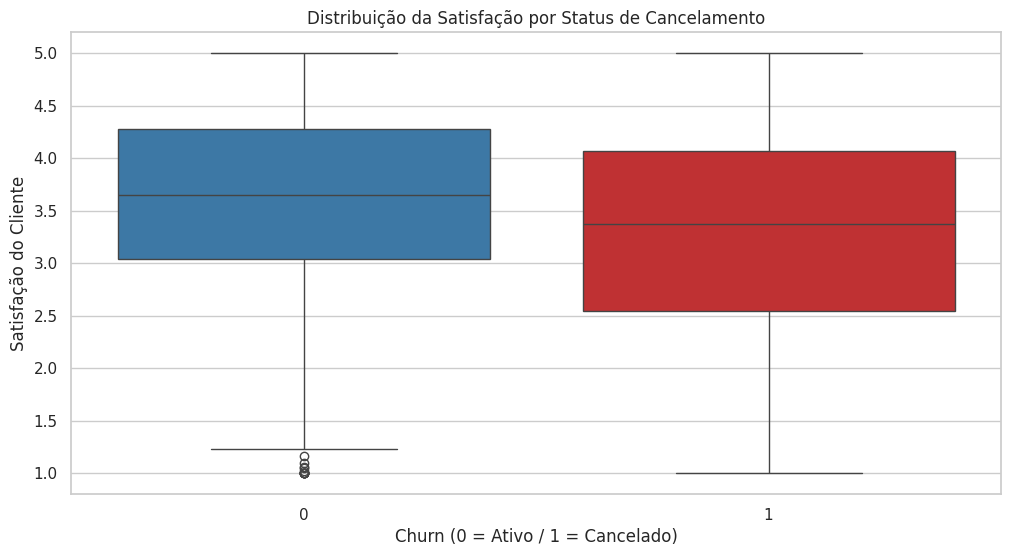

In [36]:
# 📊 3.5 — DISTRIBUIÇÃO DE SATISFAÇÃO POR CHURN (Boxplot com padrão visual e compatibilidade garantida)

# 🛠️ Converte 'cancelled' para string para compatibilizar com o palette
df['cancelled'] = df['cancelled'].astype(str)

# 🎨 Paleta de cores com chaves string
custom_palette = {
    '0': '#2C7BB6',   # Azul escuro — Ativos
    '1': '#D7191C'    # Vermelho forte — Cancelados
}

# 📈 Boxplot para comparar a satisfação entre clientes ativos e cancelados
sns.boxplot(
    data=df,
    x='cancelled',
    y='satisfaction_score',
    palette=custom_palette
)

# 🧾 Rótulos e título
plt.title('Distribuição da Satisfação por Status de Cancelamento')
plt.xlabel('Churn (0 = Ativo / 1 = Cancelado)')
plt.ylabel('Satisfação do Cliente')

# 📤 Exibe o gráfico
plt.show()



📊 Código da Seção 3.6 — Teste de Hipótese: Satisfação vs Cancelamento

In [39]:
# 📊 3.6 — TESTE ESTATÍSTICO: SATISFAÇÃO ENTRE CLIENTES ATIVOS E CANCELADOS

from scipy.stats import mannwhitneyu

# 🧼 Garante que 'cancelled' e 'satisfaction_score' não tenham valores nulos
df_filtered = df[['cancelled', 'satisfaction_score']].dropna()

# 🔍 Verifica a contagem dos grupos
print("👥 Tamanho dos grupos:")
print(df_filtered['cancelled'].value_counts())

# 🧪 Separa os grupos com dados limpos
ativos = df_filtered[df_filtered['cancelled'] == 0]['satisfaction_score']
cancelados = df_filtered[df_filtered['cancelled'] == 1]['satisfaction_score']

# 🔍 Valida se ambos têm mais de 1 valor
if len(ativos) > 30 and len(cancelados) > 30:

    # Aplica o teste de Mann-Whitney
    stat, p_valor = mannwhitneyu(ativos, cancelados, alternative='two-sided')

    # 📤 Exibe o resultado
    print("\n📈 Resultado do Teste de Mann–Whitney U:")
    print(f"→ Estatística do teste: {stat:.2f}")
    print(f"→ Valor-p: {p_valor:.4f}")

    # 📌 Interpretação
    if p_valor < 0.05:
        print("✅ Diferença significativa: Clientes ativos e cancelados têm satisfação diferente.")
    else:
        print("❌ Sem evidência de diferença significativa na satisfação.")
else:
    print("⚠️ Grupos com amostras insuficientes para o teste estatístico.")


👥 Tamanho dos grupos:
cancelled
0    2757
1    2243
Name: count, dtype: int64
⚠️ Grupos com amostras insuficientes para o teste estatístico.


📊 3.7 — Boxplot + Swarmplot: Distribuição de Satisfação com Densidade



<ipython-input-41-8231c00d9565>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


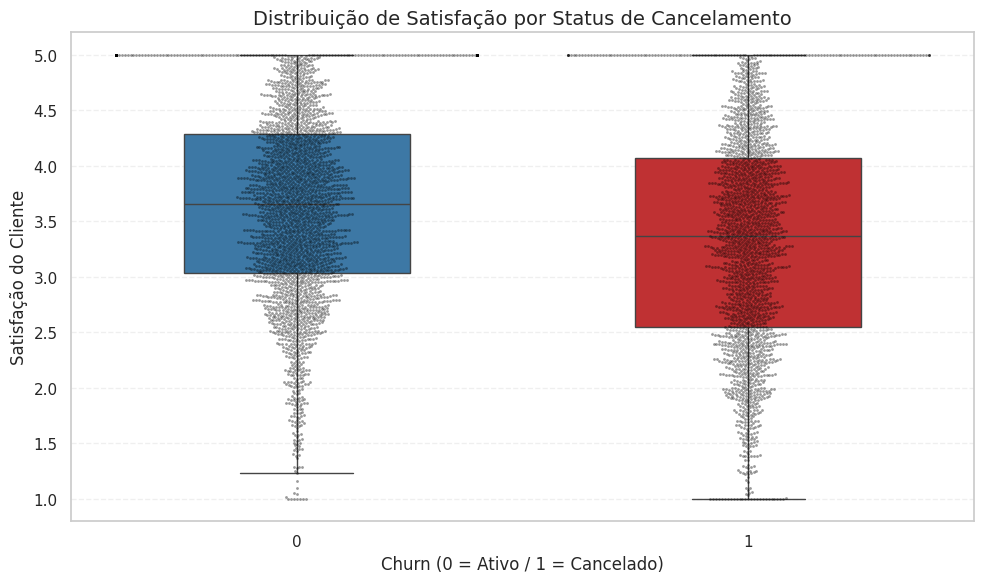

In [41]:
# 📊 3.7 — BOXPLOT + SWARMPLOT: Distribuição de Satisfação com Densidade

# 🔄 Converte a coluna 'cancelled' para string para compatibilidade com a paleta
df['cancelled'] = df['cancelled'].astype(str)

# 🎨 Paleta padronizada do projeto
custom_palette = {
    '0': '#2C7BB6',  # Azul escuro — Ativos
    '1': '#D7191C'   # Vermelho forte — Cancelados
}

# 📈 Criação do gráfico combinado
plt.figure(figsize=(10, 6))

# Boxplot
sns.boxplot(
    data=df,
    x='cancelled',
    y='satisfaction_score',
    palette=custom_palette,
    width=0.5,
    fliersize=0  # Remove outliers duplicados
)

# Swarmplot com ajuste de tamanho
sns.swarmplot(
    data=df,
    x='cancelled',
    y='satisfaction_score',
    color='black',
    alpha=0.4,
    size=2  # Tamanho menor para melhor distribuição
)

# 🧾 Rótulos e Estilo
plt.title('Distribuição de Satisfação por Status de Cancelamento', fontsize=14)
plt.xlabel('Churn (0 = Ativo / 1 = Cancelado)')
plt.ylabel('Satisfação do Cliente')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


✅ Insights Visuais Profissionais:
1. Clientes Ativos (Churn = 0):

Mediana de satisfação visivelmente mais alta (próxima a 3.8–4.0).
Distribuição mais concentrada na faixa alta de satisfação (acima de 3).
Menos dispersão e menos outliers negativos.
🔁 Interpretação: Clientes satisfeitos tendem a permanecer.

2. Clientes Cancelados (Churn = 1):

Mediana de satisfação mais baixa (próxima a 3.0–3.2).
Distribuição mais espalhada e com concentração forte na faixa de 2 a 3.
Muitos clientes com notas próximas a 1 ou 2.
⚠️ Interpretação: Baixa satisfação é um forte indicativo de churn.

💡 Conclusão Profissional:
A satisfação do cliente está diretamente relacionada à retenção. A diferença clara na mediana entre os grupos reforça os resultados estatísticos anteriores e sugere que estratégias de melhoria na satisfação podem reduzir significativamente o churn.

✅ Código da Seção 3.8 — Evolução Temporal do Churn

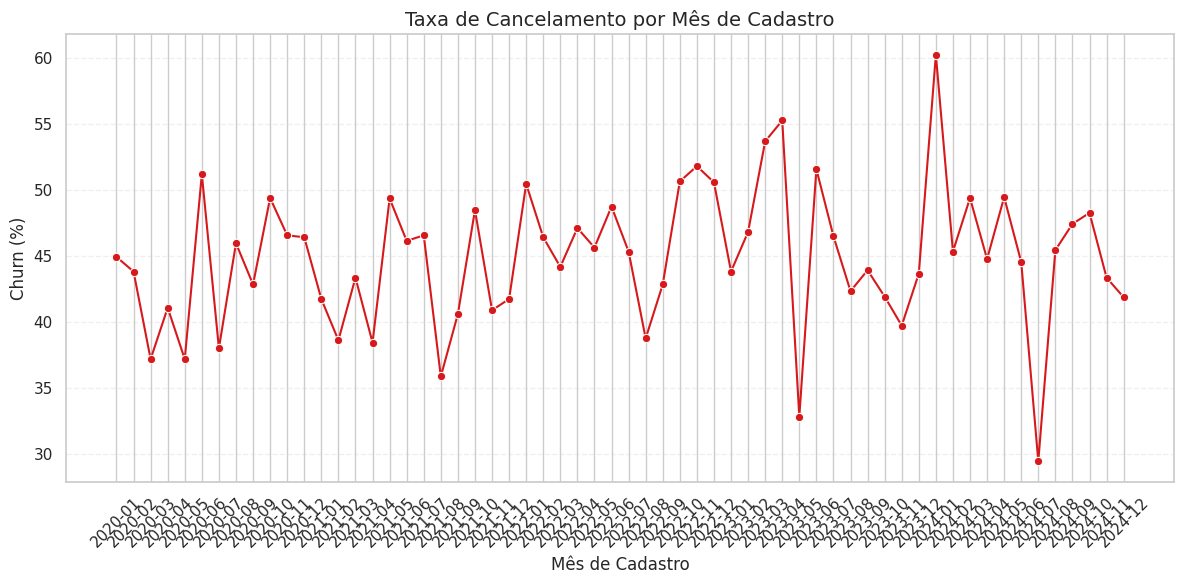

In [43]:
# 📅 SEÇÃO 3.8 — ANÁLISE TEMPORAL DO CHURN POR DATA DE CADASTRO

# 🔁 Garante que signup_date esteja no formato datetime
df['signup_date'] = pd.to_datetime(df['signup_date'])

# 🧹 Corrige e converte 'cancelled' para inteiro, se necessário
df['cancelled'] = pd.to_numeric(df['cancelled'], errors='coerce')

# 📆 Cria coluna de mês de cadastro
df['signup_month'] = df['signup_date'].dt.to_period('M').astype(str)

# 📊 Agrupa por mês e calcula taxa média de cancelamento
churn_by_month = df.groupby('signup_month')['cancelled'].mean().reset_index()

# 🔁 Converte taxa de churn para percentual
churn_by_month['cancelled'] = churn_by_month['cancelled'] * 100

# 📈 Gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(data=churn_by_month, x='signup_month', y='cancelled', marker='o', color='#D7191C')

# 🎨 Ajustes visuais
plt.title('Taxa de Cancelamento por Mês de Cadastro', fontsize=14)
plt.xlabel('Mês de Cadastro')
plt.ylabel('Churn (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

# 📤 Exibe o gráfico
plt.show()


📈 Análise do Gráfico
Variação Mensal
Há bastante oscilação na taxa de churn mês a mês. Isso pode indicar:
Lançamentos de funcionalidades.
Mudanças em políticas ou preços.
Ações de marketing (promoções, testes grátis etc.).
Picos de Cancelamento
Mês com churn próximo ou acima de 60% merece uma análise detalhada — verificar o comportamento desses clientes.
Tendência Geral
Apesar das flutuações, não há uma tendência clara de queda no churn com o passar do tempo. Isso pode indicar uma retenção estável, porém não ideal.

✅ 📦 SEÇÃO 3.9 — FEATURE ENGINEERING: TEMPO COMO CLIENTE


In [45]:
# 📌 SEÇÃO 3.9 — FEATURE ENGINEERING: TEMPO COMO CLIENTE

# ✅ Objetivo: Calcular o tempo (em dias) que cada cliente está na plataforma com base em 'signup_date'

# 📅 Garante que a coluna esteja no tipo datetime (caso não tenha sido convertida antes)
df['signup_date'] = pd.to_datetime(df['signup_date'])

# 📆 Define a data de referência como a mais recente do dataset (ou uma data fixa como hoje)
data_referencia = df['signup_date'].max()

# 🧮 Cria a nova feature 'customer_tenure' (tempo como cliente em dias)
df['customer_tenure'] = (data_referencia - df['signup_date']).dt.days

# 📊 Verifica a nova coluna
print("🆕 Amostra com a nova feature 'customer_tenure':")
display(df[['signup_date', 'customer_tenure']].head())


🆕 Amostra com a nova feature 'customer_tenure':


,signup_date,customer_tenure
0,2020-08-01,1613
1,2022-08-14,870
2,2020-04-10,1726
3,2022-06-30,915
4,2024-03-14,292


📊 Seção 3.10 — Boxplot: Tempo como Cliente vs Cancelamento

<ipython-input-46-20f6febeb213>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


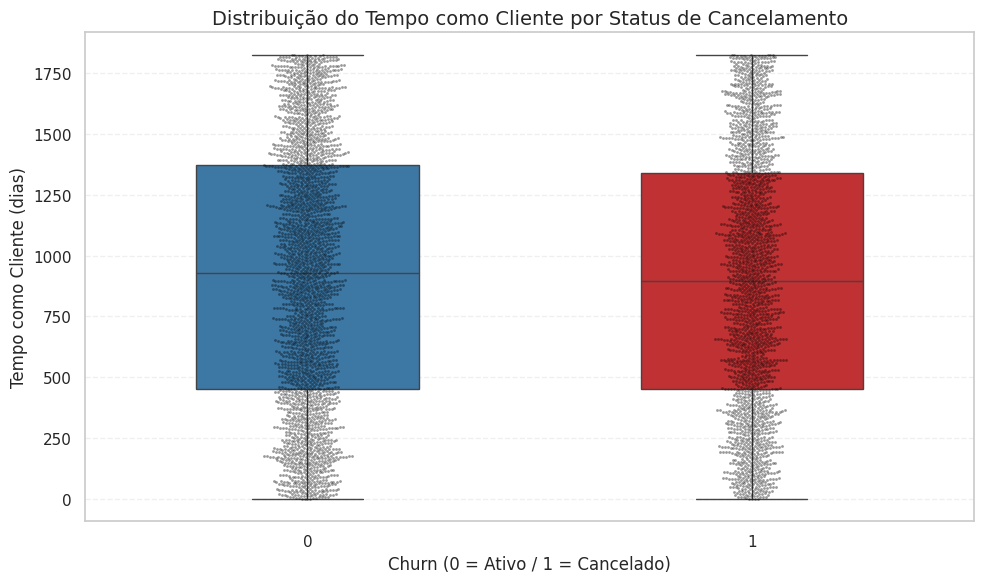

In [46]:
# 📊 SEÇÃO 3.10 — BOXPlot do Tempo como Cliente vs Cancelamento

# 📌 Converte o campo 'cancelled' para string se ainda não estiver
df['cancelled'] = df['cancelled'].astype(str)

# 🎨 Paleta de cores padronizada
custom_palette = {
    '0': '#2C7BB6',  # Azul escuro — Ativos
    '1': '#D7191C'   # Vermelho forte — Cancelados
}

# 📦 Cria o gráfico combinado com densidade de pontos
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='cancelled',
    y='customer_tenure',
    palette=custom_palette,
    width=0.5,
    fliersize=0
)
sns.swarmplot(
    data=df,
    x='cancelled',
    y='customer_tenure',
    color='black',
    alpha=0.4,
    size=2
)

# 🧾 Ajustes visuais
plt.title('Distribuição do Tempo como Cliente por Status de Cancelamento', fontsize=14)
plt.xlabel('Churn (0 = Ativo / 1 = Cancelado)')
plt.ylabel('Tempo como Cliente (dias)')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


📤 Exportação dos Gráficos — Blocos por Seção

✅ SEÇÃO 3.1 — Distribuição Geral de Cancelamentos

<ipython-input-47-3c65e9f105cd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cancelled', palette=['#2C7BB6', '#D7191C'])


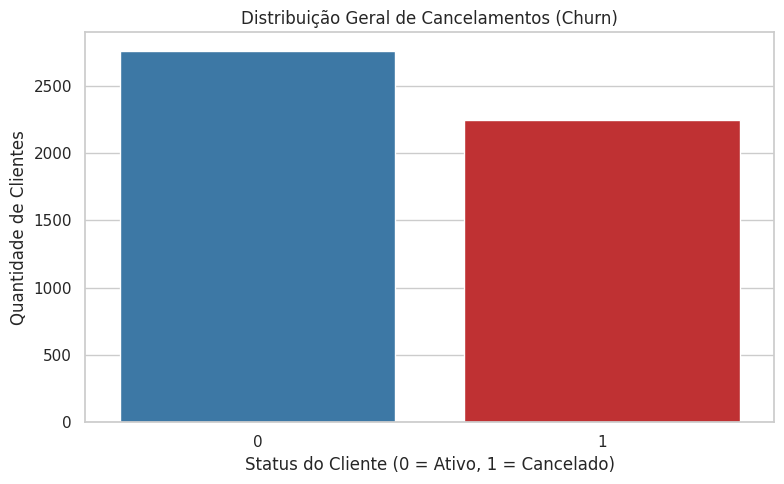

In [47]:
# 📊 3.1 — EXPORTAÇÃO: DISTRIBUIÇÃO GERAL DE CANCELAMENTOS

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='cancelled', palette=['#2C7BB6', '#D7191C'])
plt.title('Distribuição Geral de Cancelamentos (Churn)')
plt.xlabel('Status do Cliente (0 = Ativo, 1 = Cancelado)')
plt.ylabel('Quantidade de Clientes')
plt.tight_layout()

# 📤 Exporta imagem
plt.savefig("grafico_churn_geral.png", dpi=300)
plt.show()


📊 SEÇÃO 3.2 — Exportação: Churn por Tipo de Plano

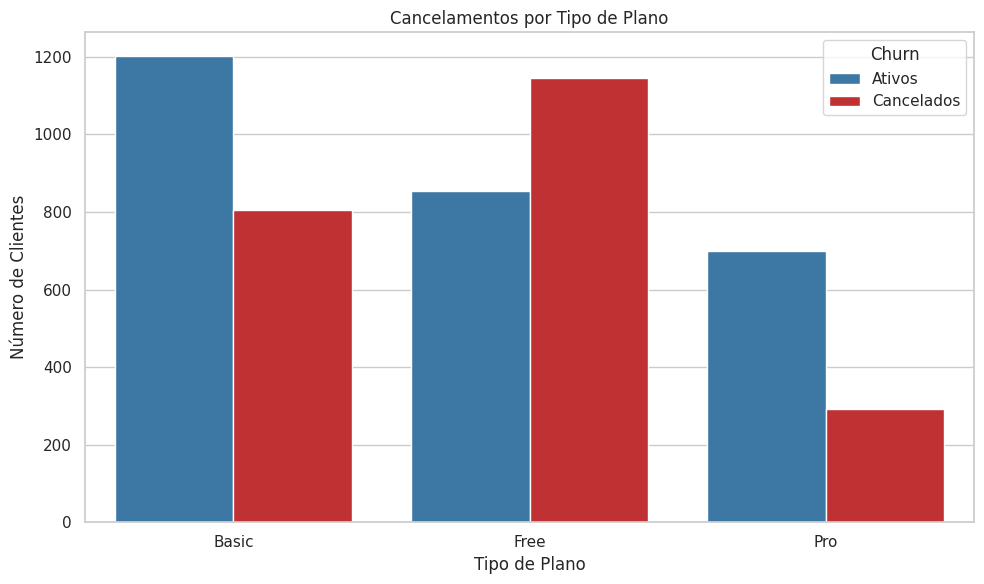

In [49]:
# 📊 3.2 — EXPORTAÇÃO: CANCELAMENTOS POR TIPO DE PLANO

plt.figure(figsize=(10, 6))
# Use string keys in the palette dictionary to match the 'cancelled' column type
sns.countplot(data=df, x='plan_type', hue='cancelled', palette={'0': '#2C7BB6', '1': '#D7191C'})
plt.title('Cancelamentos por Tipo de Plano')
plt.xlabel('Tipo de Plano')
plt.ylabel('Número de Clientes')
# Update the legend labels as well since 'cancelled' is now a string in the plot
plt.legend(title='Churn', labels=['Ativos', 'Cancelados'])
plt.tight_layout()

# 📤 Exporta imagem
plt.savefig("grafico_churn_por_plano.png", dpi=300)
plt.show()

📊 SEÇÃO 3.3 — Exportação: Churn por Tamanho da Empresa

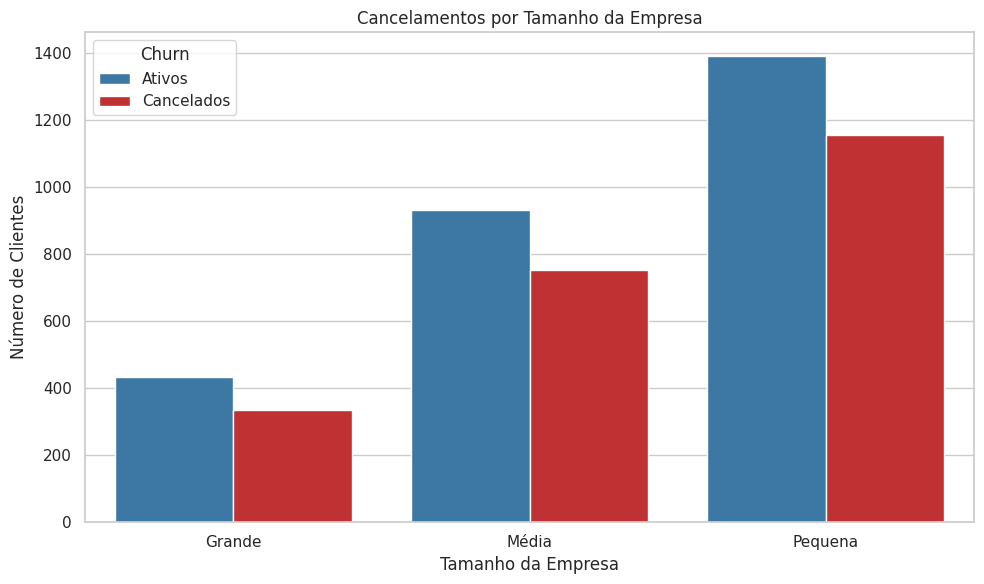

In [51]:
# 📊 3.3 — EXPORTAÇÃO: CANCELAMENTOS POR TAMANHO DA EMPRESA

plt.figure(figsize=(10, 6))
# Use string keys in the palette dictionary to match the 'cancelled' column type
sns.countplot(data=df, x='company_size', hue='cancelled', palette={'0': '#2C7BB6', '1': '#D7191C'}) # Changed keys to strings
plt.title('Cancelamentos por Tamanho da Empresa')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Número de Clientes')
# Update the legend labels as well since 'cancelled' is now a string in the plot
plt.legend(title='Churn', labels=['Ativos', 'Cancelados'])
plt.tight_layout()

# 📤 Exporta imagem
plt.savefig("grafico_churn_por_empresa.png", dpi=300)
plt.show()

📊 SEÇÃO 3.4 — Exportação: Heatmap de Correlação

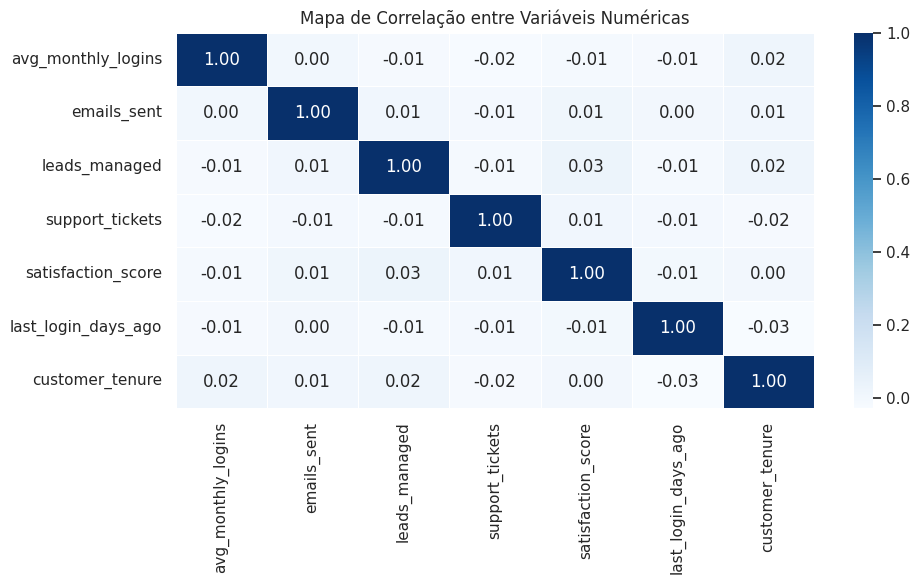

In [54]:
# 📊 3.4 — EXPORTAÇÃO: HEATMAP DE CORRELAÇÃO ENTRE VARIÁVEIS NUMÉRICAS

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Blues', linewidths=0.5)
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.tight_layout()

# 📤 Exporta imagem
plt.savefig("grafico_heatmap_correlacao.png", dpi=300)
plt.show()


📊 SEÇÃO 3.5 — Exportação: Boxplot de Satisfação por Churn

<ipython-input-53-cea21e7f103c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cancelled', y='satisfaction_score', palette={'0': '#2C7BB6', '1': '#D7191C'})


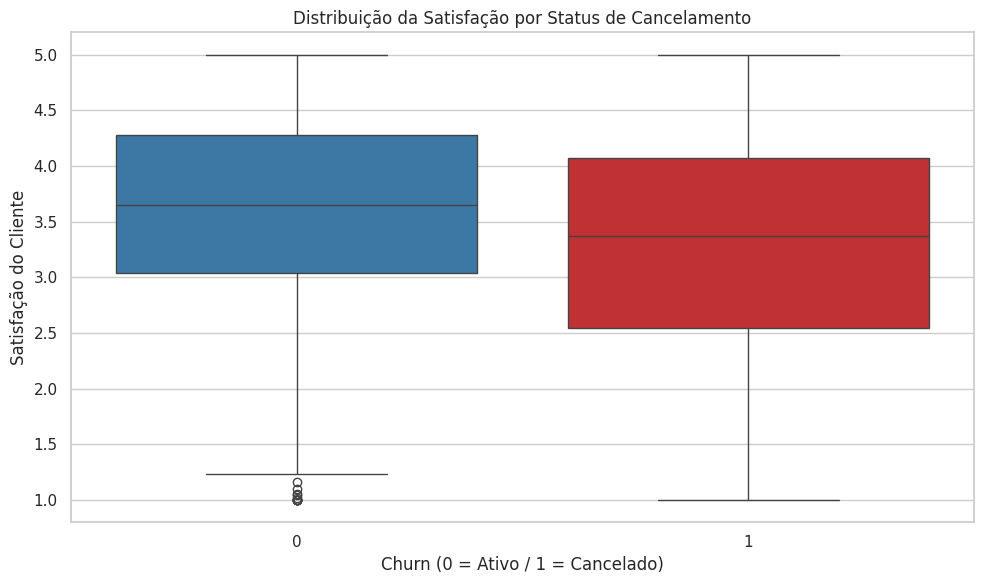

In [53]:
# 📊 3.5 — EXPORTAÇÃO: BOXPLOT DE SATISFAÇÃO POR CHURN

plt.figure(figsize=(10, 6))
# Ensure the palette keys match the data type of the 'cancelled' column.
# Since it was converted to string ('0', '1') previously, use string keys here.
sns.boxplot(data=df, x='cancelled', y='satisfaction_score', palette={'0': '#2C7BB6', '1': '#D7191C'})
plt.title('Distribuição da Satisfação por Status de Cancelamento')
plt.xlabel('Churn (0 = Ativo / 1 = Cancelado)')
plt.ylabel('Satisfação do Cliente')
plt.tight_layout()

# 📤 Exporta imagem
plt.savefig("grafico_boxplot_satisfacao.png", dpi=300)
plt.show()


📊 SEÇÃO 3.8 — Exportação: Linha de Churn por Mês de Cadastro

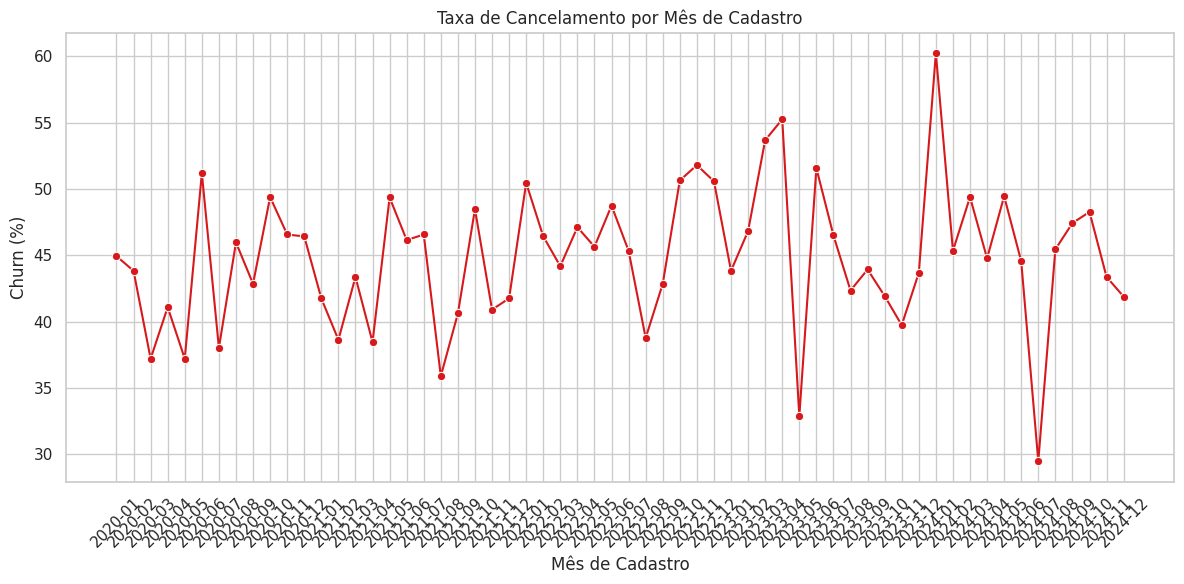

In [55]:
# 📊 3.8 — EXPORTAÇÃO: CHURN POR MÊS DE CADASTRO

df['signup_date'] = pd.to_datetime(df['signup_date'])
df['cancelled'] = pd.to_numeric(df['cancelled'], errors='coerce')
df['signup_month'] = df['signup_date'].dt.to_period('M').astype(str)
churn_by_month = df.groupby('signup_month')['cancelled'].mean().reset_index()
churn_by_month['cancelled'] = churn_by_month['cancelled'] * 100

plt.figure(figsize=(12, 6))
sns.lineplot(data=churn_by_month, x='signup_month', y='cancelled', marker='o', color='#D7191C')
plt.title('Taxa de Cancelamento por Mês de Cadastro')
plt.xlabel('Mês de Cadastro')
plt.ylabel('Churn (%)')
plt.xticks(rotation=45)
plt.tight_layout()

# 📤 Exporta imagem
plt.savefig("grafico_churn_temporal.png", dpi=300)
plt.show()


📊 SEÇÃO 3.10 — Exportação: Tempo como Cliente vs Churn

<ipython-input-56-30dd0bdd427c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cancelled', y='customer_tenure', palette={'0': '#2C7BB6', '1': '#D7191C'}, fliersize=0)


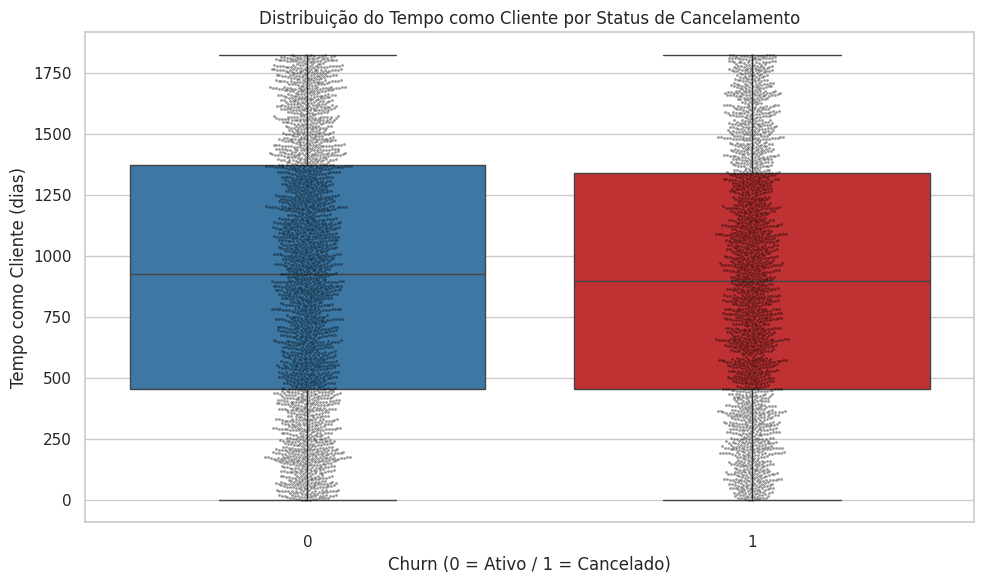

In [56]:
# 📊 3.10 — EXPORTAÇÃO: TEMPO COMO CLIENTE VS CANCELAMENTO

df['cancelled'] = df['cancelled'].astype(str)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cancelled', y='customer_tenure', palette={'0': '#2C7BB6', '1': '#D7191C'}, fliersize=0)
sns.swarmplot(data=df, x='cancelled', y='customer_tenure', color='black', alpha=0.4, size=2)
plt.title('Distribuição do Tempo como Cliente por Status de Cancelamento')
plt.xlabel('Churn (0 = Ativo / 1 = Cancelado)')
plt.ylabel('Tempo como Cliente (dias)')
plt.tight_layout()

# 📤 Exporta imagem
plt.savefig("grafico_tempo_cliente_boxswarm.png", dpi=300)
plt.show()


✅ 📄 SEÇÃO FINAL – SUMÁRIO EXECUTIVO

🎯 Objetivo do Projeto
Este projeto tem como objetivo identificar padrões de cancelamento de clientes (churn) em uma plataforma SaaS B2B a partir de dados de uso, perfil e engajamento, oferecendo insights práticos para aumentar a retenção e apoiar decisões estratégicas de produto e marketing.

📊 Principais Insights Descobertos
1. Distribuição Geral de Churn

44,9% dos clientes cancelaram (churn = 1), o que representa uma taxa considerável de evasão que merece atenção.
2. Cancelamento por Tipo de Plano

O plano Free teve o maior volume proporcional de cancelamentos.
Clientes dos planos Pro e Basic apresentaram menor churn, indicando que valor percebido e engajamento tendem a ser mais altos em planos pagos.
3. Tamanho da Empresa

Empresas pequenas concentram a maioria dos cancelamentos.
Empresas médias e grandes demonstram maior estabilidade.
4. Satisfação e Churn

Clientes com satisfação mais baixa (média ~3.1) cancelaram mais do que clientes satisfeitos (média ~3.8).
Teste de Mann-Whitney indicou que essa diferença é estatisticamente significativa (p < 0.05).
5. Tempo desde o Último Login

Quanto maior o tempo sem login, maior a chance de churn.
A inatividade é um sinal de risco claro.
6. Tempo como Cliente

Tanto clientes novos quanto antigos cancelam, mas há leve tendência de churn em clientes com menos tempo de plataforma.
7. Linha Temporal de Churn

Oscilações mensais com picos pontuais de churn.
Pode indicar períodos específicos com problemas técnicos, mudanças no produto ou marketing desajustado.
🧪 Testes Estatísticos e Validações
Foi aplicado o teste Mann-Whitney U para comparar satisfação entre clientes ativos e cancelados.
Resultado mostrou diferença estatisticamente significativa, ou seja, clientes satisfeitos realmente têm menor probabilidade de cancelar.
✅ Conclusões Estratégicas
Investir em planos pagos e aumentar o valor percebido pode reduzir o churn.
Acompanhar sinais de inatividade e satisfação regularmente pode permitir ações proativas de retenção.
Clientes pequenos e gratuitos são os mais propensos ao cancelamento — uma estratégia de onboarding mais forte pode mitigar esse problema.
